In [70]:
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
import json
from functools import reduce

tqdm.pandas()

In [71]:
def func(values):
    intervals = values.split(' ')[:-1]
    drop = []
    for i in range(len(intervals)):
        for j in range(i + 1, len(intervals)):
            if np.array_equal(intervals[i].split('_')[:-1], intervals[j].split('_')[:-1]):
                drop.append(j)
    drop = list(set(drop))
    intervals_new = []
    for i in range(len(intervals)):
        if i in drop:
            continue
        intervals_new.append(intervals[i])
    return ' '.join(intervals_new)

true = pd.read_csv('0_test_clean.csv')
true = true[~true['0'].isna()]
true['0'] = true['0'].progress_apply(func)
true['len'] = true['0'].apply(lambda x: len(x.split(' ')))
print(true.shape)
true.head()

  0%|          | 0/2780 [00:00<?, ?it/s]

(2780, 2)


,0,len
2,3_4_3152,1
23,1_3_1355,1
32,1_4_3198,1
64,1_4_644,1
65,1_4_3887 1_5_5344 2_2_734,3


In [72]:
false = pd.read_csv('1_test_clean.csv')
false = false[~false['0'].isna()]
false['0'] = false['0'].progress_apply(func)
false['len'] = false['0'].apply(lambda x: len(x.split(' ')))

print(false.shape)
false.head()

  0%|          | 0/2061 [00:00<?, ?it/s]

(2061, 2)


,0,len
3,1_2_969,1
18,1_5_4119,1
21,1_4_6187,1
38,1_5_4005,1
75,5_5_1656,1


In [73]:
d = json.load(open('occurences.json', 'r'))

In [74]:
idx_train = []
for i, row in tqdm(true.iterrows(), total=true.shape[0]):
    intervals = row['0'].split(' ')
    idx_train.append([])
    for inv1 in intervals:
        idx_train[-1].append(d[inv1])
true['idx_train'] = idx_train

  0%|          | 0/2780 [00:00<?, ?it/s]

In [75]:
idx_train = []
for i, row in tqdm(false.iterrows(), total=false.shape[0]):
    intervals = row['0'].split(' ')
    idx_train.append([])
    for inv1 in intervals:
        idx_train[-1].append(d[inv1])
false['idx_train'] = idx_train

  0%|          | 0/2061 [00:00<?, ?it/s]

In [76]:
true['intersection'] = true['idx_train'].apply(lambda x: len(reduce(np.intersect1d, x)))
false['intersection'] = false['idx_train'].apply(lambda x: len(reduce(np.intersect1d, x)))


In [77]:
import matplotlib.pyplot as plt

In [78]:
true = true[true['len'] > 1]
false = false[false['len'] > 1]

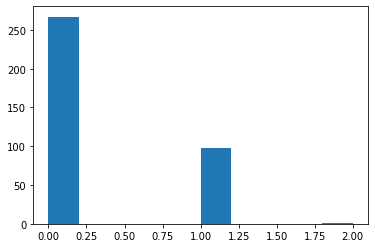

In [79]:
plt.hist(true['intersection'])
plt.show()

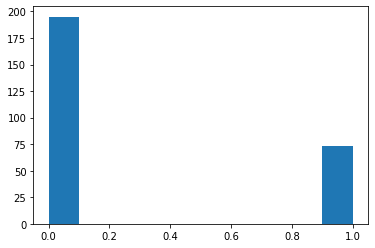

In [80]:
plt.hist(false['intersection'])
plt.show()

In [81]:
true['union'] = true['idx_train'].apply(lambda x: len(reduce(np.union1d, x)))
false['union'] = false['idx_train'].apply(lambda x: len(reduce(np.union1d, x)))


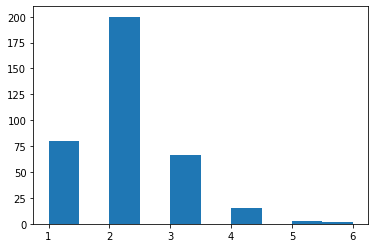

In [82]:
plt.hist(true['union'])
plt.show()

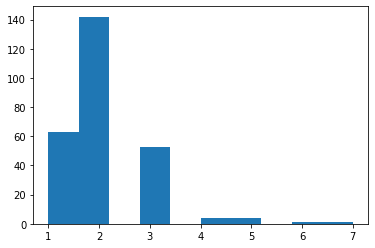

In [83]:
plt.hist(false['union'])
plt.show()

In [ ]:
data[]

In [84]:
true[true['union'] > 3]

,0,len,idx_train,intersection,union
794,1_4_1630 3_4_1509 4_5_3660,3,"[[30305, 52204], [53935], [97800]]",0,4
3836,1_2_434 1_4_4436,2,"[[16058, 38361, 111471], [81808]]",0,4
4462,1_5_292 2_3_1338,2,"[[5455, 14274], [35984, 49106]]",0,4
4652,1_3_496 1_4_3474 1_5_4119,3,"[[9532], [64023], [54803, 102566]]",0,4
5969,1_2_1702 1_4_1695 1_5_2128,3,"[[60222, 116432], [31570], [28578, 28584]]",0,5
6604,1_2_2755 1_4_4902 1_5_8631,3,"[[96611], [90573, 109238], [115222]]",0,4
14429,1_2_2642 1_4_1882 3_6_461,3,"[[92710], [34715, 34727, 64502], [65530, 65531]]",0,6
15650,1_4_820 1_5_337,2,"[[15242, 78980, 99131, 113467], [6234, 64383]]",0,6
17217,1_2_1219 1_5_6138 2_2_1693 3_2_273,4,"[[43778], [81916], [104074], [26628]]",0,4
17279,1_4_4438 1_6_898,2,"[[81848], [26294, 32925, 68242]]",0,4


In [85]:
false[false['union'] > 3]

,0,len,idx_train,intersection,union
2233,1_4_4257 1_5_1722,2,"[[15623, 37825, 78464], [23011, 35529]]",0,5
3491,1_4_2694 2_2_730,2,"[[49628, 78648], [45892, 70715]]",0,4
7705,1_3_780 1_4_531,2,"[[13207], [10563, 39514, 101646, 112038]]",0,5
7855,1_4_3833 1_6_701,2,"[[70503, 70507], [54522, 100735]]",0,4
11289,1_4_587 1_5_6412,2,"[[8470, 11329, 112603], [85544]]",0,4
17045,3_4_771 6_3_497,2,"[[18686, 18692, 28101, 105287], [32684]]",0,5
19348,1_2_3237 1_4_1784,2,"[[112754], [9432, 22959, 33066, 92770, 94567, ...",0,7
26424,1_3_4780 1_4_6184 3_5_2103 4_4_1117,4,"[[83051, 101439], [39276, 114236], [48808], [4...",0,5
28419,1_3_716 1_5_4945 2_3_2832 2_5_2191 3_2_1189,5,"[[12447], [34311, 65940], [74157], [40694], [1...",0,6
29560,1_3_2975 1_4_5214,2,"[[12344, 51930], [16319, 96161]]",0,4


In [18]:
drop = []
items = list(d.items())
for i, (k1, v1) in tqdm(enumerate(items), total=len(items)):
    for k2, v2 in items[i + 1:]:
        if k1 == k2:
            continue
        if '_'.join(k1.split('_')[:-1]) == '_'.join(k2.split('_')[:-1]):
            if len(np.intersect1d(v1, v2)) == len(v1):
                drop.append((k1, k2))

  0%|          | 0/126746 [00:00<?, ?it/s]

KeyboardInterrupt: 

(array([321.,   0.,   0.,   0.,   0.,  38.,   0.,   0.,   0.,   7.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

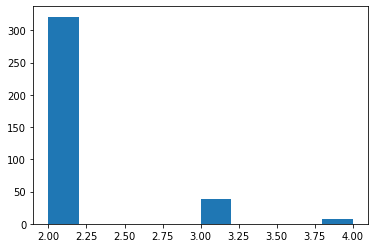

In [86]:
plt.hist(true['len'])

(array([241.,   0.,   0.,  24.,   0.,   0.,   1.,   0.,   0.,   2.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

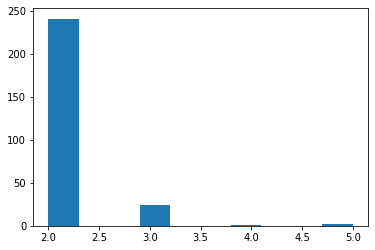

In [87]:
plt.hist(false['len'])

In [92]:
true[true['len'] > 2]

,0,len,idx_train,intersection,union
65,1_4_3887 1_5_5344 2_2_734,3,"[[71444], [71444], [46110]]",0,2
304,1_2_2584 1_3_2218 2_4_720,3,"[[90931], [39210], [20796]]",0,3
360,1_2_1027 1_3_2475 1_4_3981,3,"[[37645], [43680], [73180]]",0,3
550,1_2_904 2_2_642 2_3_1075,3,"[[32917], [40498], [28428]]",0,3
794,1_4_1630 3_4_1509 4_5_3660,3,"[[30305, 52204], [53935], [97800]]",0,4
1727,1_5_7110 2_6_271 9_5_1652,3,"[[94496], [31817], [77036]]",0,3
2462,1_4_5182 2_4_483 2_5_740,3,"[[95419], [13985], [13985]]",0,2
3627,1_3_5405 1_5_1421 2_4_658,3,"[[94286], [18969], [18969]]",0,2
4453,1_4_715 2_2_1312 3_4_817,3,"[[13269], [79684], [29535]]",0,3
4652,1_3_496 1_4_3474 1_5_4119,3,"[[9532], [64023], [54803, 102566]]",0,4


In [94]:
test = pd.read_csv('/home/avpodtikhov/trendchange/source/test_stocks.csv')
test.head()

,Ticker,index,Date,extremum,-1,-2,-3,-4,-5,-6,...,-275,-276,-277,-278,-279,-280,-281,-282,-283,-284
0,000019.SZ,45.0,2020-04-24,1.0,0.819562,0.655986,0.507589,0.372681,0.246206,0.229342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000020.SZ,95.0,2020-07-10,1.0,0.835148,0.807154,0.720062,0.665630,0.606532,0.552100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000020.SZ,238.0,2021-02-05,0.0,0.018663,0.041991,0.041991,0.041991,0.068429,0.125972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000031.SZ,237.0,2021-02-04,0.0,0.022941,0.030588,0.057352,0.191174,0.202644,0.202644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000037.SZ,102.0,2020-07-21,1.0,0.850453,0.937311,0.814199,0.686556,0.788520,0.735650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


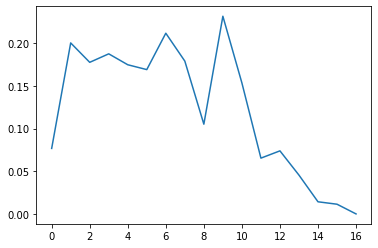

In [105]:
plt.plot(test.loc[475].iloc[3:20].values[::-1])

In [104]:
false[false]

,0,len,idx_train,intersection,union
475,3_6_773 4_2_244,2,"[[104074], [29060]]",0,2
663,1_4_2162 2_2_716,2,"[[40053], [45196]]",0,2
691,1_4_2339 2_3_1597,2,"[[8371, 43087], [43087]]",1,2
865,1_2_560 1_4_444,2,"[[20537], [2391, 9552]]",0,3
913,1_3_631 1_4_4834,2,"[[11086], [89264]]",0,2
...,...,...,...,...,...
32001,1_5_8691 2_4_4205,2,"[[116102], [116102]]",1,1
32024,4_3_29 5_2_6,2,"[[1454], [1454]]",1,1
32025,1_6_1293 6_3_437,2,"[[96222], [29136]]",0,2
32180,1_5_2666 2_5_101,2,"[[35962], [2208]]",0,2
